# Example - Clip Box

In [1]:
import rioxarray # for the extension to load
import xarray

%matplotlib inline

/home/snowal/miniconda3/envs/geocube/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/snowal/miniconda3/envs/geocube/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Load in xarray dataset

In [2]:
xds = xarray.open_dataarray("MODIS_ARRAY.nc")

In [3]:
xds

<xarray.DataArray (y: 200, x: 200)>
array([[ nan,  nan,  nan, ..., 656., 656., 554.],
       [ nan,  nan,  nan, ..., 694., 694., 642.],
       [ nan,  nan,  nan, ..., 456., 575., 642.],
       ...,
       [993., 817., 817., ..., 471., 479., 498.],
       [893., 893., 816., ..., 479., 479., 469.],
       [816., 816., 832., ..., 515., 469., 485.]], dtype=float32)
Coordinates:
  * y        (y) float64 5.05e+06 5.05e+06 5.05e+06 ... 5.004e+06 5.004e+06
  * x        (x) float64 -7.274e+06 -7.274e+06 ... -7.228e+06 -7.228e+06
Attributes:
    crs:        +a=6371007.181 +b=6371007.181 +lon_0=0 +no_defs +proj=sinu +u...
    res:        [231.65635826 231.65635826]
    is_tiled:   0
    nodata:     -28672.0
    transform:  [ 2.31656358e+02  0.00000000e+00 -7.27400965e+06  0.00000000e...

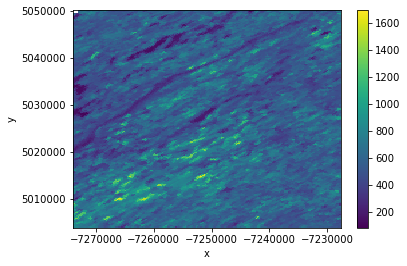

In [4]:
xds.plot()

## Clip using a bounding box

In [5]:
xdsc = xds.rio.clip_box(
    minx=-7272967.1958741,
    miny=5048602.84382404,
    maxx=-7272503.88315758,
    maxy=5049066.15654056,
)

In [6]:
xdsc

<xarray.DataArray (y: 3, x: 3)>
array([[245., 331., 331.],
       [221., 500., 500.],
       [490., 490., 670.]], dtype=float32)
Coordinates:
  * y            (y) float64 5.049e+06 5.049e+06 5.049e+06
  * x            (x) float64 -7.273e+06 -7.273e+06 -7.273e+06
    spatial_ref  int64 0
Attributes:
    transform:     (231.656358263921, 0.0, -7273083.024053236, 0.0, -231.6563...
    grid_mapping:  spatial_ref

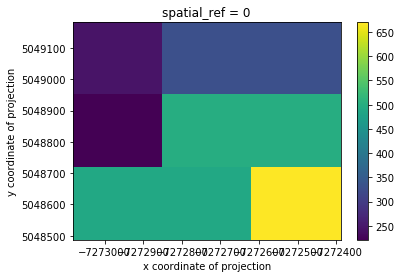

In [7]:
xdsc.plot()